This is this third in a series of notebooks designed to show you how to <i>analyze</i> social media data. For demonstration purposes we are looking at tweets sent by CSR-related Twitter accounts -- accounts related to ethics, equality, the environment, etc. -- of Fortune 200 firms in 2013. We assume you have already downloaded the data and have completed the steps taken in <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a> and  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%202%20-%20Aggregating%20and%20Analyzing%20Data%20by%20Twitter%20Account.ipynb" target="_blank">Chapter 2</a>. In this third notebook I will show you how to conduct various <i>temporal</i> analyses of the Twitter data. Essentially, we will be taking the tweet-level data and aggregating to the account level.

# Chapter 3: Analyze Twitter Data by Time Period

First, we will import several necessary Python packages and set some options for viewing the data. As with <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a> and  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%202%20-%20Aggregating%20and%20Analyzing%20Data%20by%20Twitter%20Account.ipynb" target="_blank">Chapter 2</a>, we will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations.

### Import packages and set viewing options

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

I'm using version 0.16.2 of PANDAS

In [3]:
pd.__version__

'0.16.2'

We'll use the <i>calendar</i> package for one of our temporal manipulations.

In [39]:
import calendar

#### Import graphing packages

We'll be producing some figures at the end of this tutorial so we need to import various graphing capabilities. The default Matplotlib library is solid. 

In [4]:
import matplotlib
print matplotlib.__version__

1.4.3


In [5]:
import matplotlib.pyplot as plt

In [6]:
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*

One of the great innovations of ipython notebook is the ability to see output and graphics "inline," that is, on the same page and immediately below each line of code. To enable this feature for graphics we run the following line.

In [7]:
%matplotlib inline  

We will be using <i>Seaborn</i> to help pretty up the default Matplotlib graphics. Seaborn does not come installed with Anaconda Python so you will have to open up a terminal and run <i>pip install seaborn</i>.

In [8]:
import seaborn as sns
print sns.__version__

0.6.0


<br>The following line will set the default plots to be bigger.

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)

<br>Version 1.4 of matplotlib enables specific plotting styles. Let's check which ones are already imported so we can play around with them later.

In [10]:
import matplotlib as mpl

In [11]:
mpl.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']

### Read in data

In <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a> we deleted tweets from one unneeded Twitter account and also omitted several unnecessary columns (variables). We then saved, or "pickled," the updated dataframe. Let's now open this saved file. As we can see in the operations below this dataframe contains 54 variables for 32,330 tweets.

In [12]:
df = pd.read_pickle('CSR tweets - 2013 by 41 accounts.pkl')
print len(df)
df.head(2)

32330


,rowid,query,tweet_id_str,inserted_date,language,coordinates,retweeted_status,created_at,month,year,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_favourites_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,favorite_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,retweeted_user,retweeted_user_description,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
0,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,en,NaN,NaN,2013-02-27 22:43:19.000000,2,2013,@louloushive (Tweet 2) We encourage other empl...,humanavitality,274041023,2859,440,38,25,1766,This is the official Twitter account for Human...,NaN,Tue Mar 29 16:23:02 +0000 2011,0,0,NaN,0,NaN,0,louloushive,1,louloushive,3.062183e+17,web,NaN,NaN,NaN,NaN,NaN,0,0,0,121,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
1,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,es,NaN,NaN,2013-03-04 16:34:17.000000,3,2013,¿Sabes por qué la #vacuna contra la #neumonía ...,FundacionPfizer,188384056,2464,597,50,11,2400,Noticias sobre Responsabilidad Social y Fundac...,México,Wed Sep 08 16:14:11 +0000 2010,1,0,NaN,0,"vacuna, neumonía",2,NaN,0,NaN,NaN,web,NaN,NaN,NaN,NaN,NaN,0,0,0,138,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1


<br>

List all the columns in the DataFrame

In [13]:
df.columns

Index([u'rowid', u'query', u'tweet_id_str', u'inserted_date', u'language',
       u'coordinates', u'retweeted_status', u'created_at', u'month', u'year',
       u'content', u'from_user_screen_name', u'from_user_id',
       u'from_user_followers_count', u'from_user_friends_count',
       u'from_user_listed_count', u'from_user_favourites_count',
       u'from_user_statuses_count', u'from_user_description',
       u'from_user_location', u'from_user_created_at', u'retweet_count',
       u'favorite_count', u'entities_urls', u'entities_urls_count',
       u'entities_hashtags', u'entities_hashtags_count', u'entities_mentions',
       u'entities_mentions_count', u'in_reply_to_screen_name',
       u'in_reply_to_status_id', u'source', u'entities_expanded_urls',
       u'entities_media_count', u'media_expanded_url', u'media_url',
       u'media_type', u'video_link', u'photo_link', u'twitpic',
       u'num_characters', u'num_words', u'retweeted_user',
       u'retweeted_user_description', u'retweet

<br>Refresher: We can use the <i>len</i> function again here to see how many columns there are in the dataframe: 54.

In [14]:
len(df.columns)

54

<br>And we can see what types of variable each column is -- an integer (int64), a numerical float variable (float), or a text variable (object).

In [15]:
df.dtypes

rowid                                 int64
query                                object
tweet_id_str                          int64
inserted_date                        object
language                             object
coordinates                          object
retweeted_status                     object
created_at                           object
month                                 int64
year                                  int64
content                              object
from_user_screen_name                object
from_user_id                          int64
from_user_followers_count             int64
from_user_friends_count               int64
from_user_listed_count                int64
from_user_favourites_count            int64
from_user_statuses_count              int64
from_user_description                object
from_user_location                   object
from_user_created_at                 object
retweet_count                         int64
favorite_count                  

### Convert created_at to time variable

To work with time, we first have to have a variable in our dataframe that indicates time. We will use the <i>created_at</i> column, which represents the time at which the tweet was created. In the following line we will convert this variable from text format to python's <i>datetime</i> format.

In [16]:
df.dtypes[:8]

rowid                int64
query               object
tweet_id_str         int64
inserted_date       object
language            object
coordinates         object
retweeted_status    object
created_at          object
dtype: object

In [17]:
df['created_at'] = pd.to_datetime(df['created_at'])

<br>Let's take another look at the column types. This time we'll just look at the first 8 columns, using python's splicing capabilities (the '[:8]' command tells us we want to return up to the 8th column; this is a useful tool for other applications as well). We see that the <i>created_at</i> column is now a datetime64 object. We now will now be able to manipulate the data -- sorting, indexing, aggregating, and the like -- based on time.  

In [18]:
df.dtypes[:8]

rowid                        int64
query                       object
tweet_id_str                 int64
inserted_date               object
language                    object
coordinates                 object
retweeted_status            object
created_at          datetime64[ns]
dtype: object

### Set the Index 

One thing you'll have to frequently do in PANDAS is set an <i>index</i> to your dataframe. For the non-programmer this can be a bit difficult to wrap your head around. You might think of the index as a tool for organizing or categorizing your data. For instance, will you organize your data alphabetically, by organization, by time, by location, or by whether it includes a photo? Each of these would require a different index variable. What we are going to do here is set the index to be our <i>created_at</i> variable. This will allow us to manipulate the data by time. 

In [19]:
df = df.set_index(['created_at'])
df.head(2)

,rowid,query,tweet_id_str,inserted_date,language,coordinates,retweeted_status,month,year,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_favourites_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,favorite_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,retweeted_user,retweeted_user_description,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-02-27 22:43:19,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,en,NaN,NaN,2,2013,@louloushive (Tweet 2) We encourage other empl...,humanavitality,274041023,2859,440,38,25,1766,This is the official Twitter account for Human...,NaN,Tue Mar 29 16:23:02 +0000 2011,0,0,NaN,0,NaN,0,louloushive,1,louloushive,3.062183e+17,web,NaN,NaN,NaN,NaN,NaN,0,0,0,121,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
2013-03-04 16:34:17,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,es,NaN,NaN,3,2013,¿Sabes por qué la #vacuna contra la #neumonía ...,FundacionPfizer,188384056,2464,597,50,11,2400,Noticias sobre Responsabilidad Social y Fundac...,México,Wed Sep 08 16:14:11 +0000 2010,1,0,NaN,0,"vacuna, neumonía",2,NaN,0,NaN,NaN,web,NaN,NaN,NaN,NaN,NaN,0,0,0,138,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1


<br>Look at the far-left column in bold above. That's our index column, and it's no longer 0,1,2 but rather our <i>created_at</i> variable. We have effectively told PANDAS that each row (i.e., each tweet) is ready to be indexed according to the values of the <i>created_at</i> column, which, as we did earlier, is a <i>datetime</i> variable. 

## Generate and Plot Number of Tweets over Different Time Periods

Recall that in  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%202%20-%20Aggregating%20and%20Analyzing%20Data%20by%20Twitter%20Account.ipynb" target="_blank">Chapter 2</a> we took our tweet-level dataframe and converted it to an account-level dataframe by aggregating the tweets based on the account variable. We did this by first writing an aggregation function and second by applying that function with a <i>groupby</i> command. We're going to do something similar here except that we'll be aggregating by time; differently put, we will be "collapsing" the data by time rather than by Twitter account.

As in the last chapter, our first step is to create a function to spell out which variables (columns) from our dataframe that we wish to keep and/or aggregate. Specifically, the following function is first designed to produce a variable called <i>Number_of_tweets</i> that is a <i>count</i> of the number of tweets sent; we are basing this on the "content" column but we could have chosen others. This is the same function written in Chapter 2, except that we don't need the second and third variables

In [20]:
def f(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        ))

### Generate and Plot Daily Counts

First, let's analyze the data by day of the year. To do this, we need to convert our tweet-level dataset -- a dataset where each row is dedicated to one of the 32,330 tweets -- to a daily dataset. This process is called <i>aggregation</i> and the output will be a new dataframe with 365 rows -- one per day.

In the following block of code we will now <i>apply</i> the above function to our dataframe. Note the <i>groupby</i> command again -- same as in Chapter 2. This is how we aggregate the data. We are asking PANDAS to create a new dataframe, called <i>daily_count</i>, and asking that this new dataframe be based on aggregating our original dataframe by the <i>index</i> column, applying the function <i>f</i> we wrote above. In other words, we are going to our original dataframe of 32,330 tweets, and aggregating or collapsing that data based on the day of the year it was sent. We are thus converting our tweet-level dataset with 32,330 rows into a daily dataset with 365 rows. As you can see in the output, there are 365 observations in this new dataframe -- one per day. 

Notice also that we are accessing the "date" element of our index variable (see <i>index.date</i>). Here you'll start to see the power of the Python's <i>datetime</i> variables -- by specifying ".date", we are telling PANDAS we want to access only the particular day/month/year combination indicated included in the <i>created_at</i> column.

In [21]:
daily_count = df.groupby(df.index.date).apply(f)
print len(daily_count)
daily_count.head(5)

365


,Number_of_tweets
2013-01-01,24
2013-01-02,71
2013-01-03,92
2013-01-04,94
2013-01-05,38


<br>You'll see above that the index column (in bold) is the date. Let's give a name to this index and then inspect the first five rows in the dataframe.

In [22]:
daily_count.index.name = 'date'
daily_count.head(5)

,Number_of_tweets
date,
2013-01-01,24
2013-01-02,71
2013-01-03,92
2013-01-04,94
2013-01-05,38


<br>It's always good to inspect your data to do that it worked as expected. We already know there are 365 rows, which is a good sign. Let's now look at the last five rows of the dataframe.

In [23]:
daily_count.tail(5)

,Number_of_tweets
date,
2013-12-27,35
2013-12-28,13
2013-12-29,8
2013-12-30,25
2013-12-31,234


<rb>OK, that's exactly what we were expecting, too. Let's run two more lines of code to see what the minimum and maximum daily values are in the dataset.

In [24]:
daily_count.index.min()

datetime.date(2013, 1, 1)

In [25]:
daily_count.index.max()

datetime.date(2013, 12, 31)

<br>Perfect. We're all set. Now let's plot it. If you recall from Chapter 2, we are using iPython's built-in graphics package <i>matplotlib</i>, and making the plots prettier by applying the <i>Seaborn</i> package's tweaks to matplotlib. PANDAS makes it easy to produce fine plots of your data, thought typically the default graphs have a few things we'd like to tweak. Learning the ins and outs of all the possible modifications takes time, so don't worry about learning them all now. Instead, I'd recommend using the following examples as a template for your own data and then learning new options as you need them.

In the code block below I modify the transparency of the graph (using "alpha"), change the font size and the rotation of the x-axis ticks labels, add/change the y-axis and x-axis headings, make them bold, and add some extra spacing. I then save the output as a .png file that you can then insert into your Word or LaTeX file. I have left the title out of these figures -- I recommend adding these in later in Word/LaTeX.

One final note: I have added comments to the code below. In Python, anything after the pound sign ('#') is considered a comment. It's good coding practice.

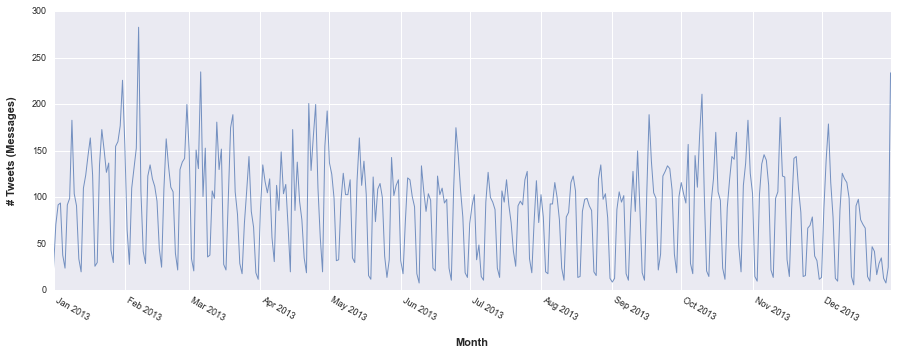

In [26]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png')   #SAVE PLOT IN PNG FORMAT

#### Output account-level data to CSV file

As shown in Chapter 1, it is simple to save the output of any of the temporally aggregated files we have created above. For example, let's output <i>daily_count</i> to a CSV file. This will give us a file with 365 rows and two  columns above: <i>date</i> and <i>Number_of_tweets</i>. 

In [77]:
daily_count.to_csv('Number of Tweets per Day.csv')

PANDAS can output to <a href="http://pandas.pydata.org/pandas-docs/stable/io.html" target="_blank">a number of different formats</a>. I most commonly use <i>to_csv, to_excel, to_json</i>, and <i>to_pickle</i>.

### Generate and Plot Day-of-the-Week Tweets

Now let's create a dataframe with a count of the number of tweets per day of the week. We can apply the same function <i>f</i> and use the same index variable <i>date</i>. The only difference is that we will access the "weekday" element of our index variable <i>created_at</i>. It bears repeating that we converted <i>created_at</i> to a python <i>datetime</i> variable and, fortunately for us, this type of variable has a number of different attributes we can access, including <i>second, minute, hour, day, weekday, month</i>, and <i>year</i>.

In the following block of code we will now apply our aggregating function <i>f</i> to our dataframe <i>df</i> and use the <i>groupby</i> command again -- only this time we are aggregating on the <i>weekday</i> attribute of our datetime variable. We are thus asking PANDAS to create a new dataframe, called <i>weekday_count</i>, and asking that this new dataframe be based on aggregating our original dataframe by <i>index.weekday</i>, applying the function <i>f</i> we wrote above. In other words, we are going to our original dataframe of 32,330 tweets, and aggregating or collapsing that data based on the day of the week it was sent. We are thus converting our tweet-level dataset with 32,330 rows into a daily dataset with 7 rows. 

In [27]:
weekday_count = df.groupby(df.index.weekday).apply(f)
print len(weekday_count)
weekday_count

7


,Number_of_tweets
0,5306
1,6467
2,6715
3,6108
4,5264
5,1513
6,957


<br>In the datetime variable, '0' is Monday and '6' is Sunday. Let's add another column to our new dataframe with the names of the days of the week. The first line creates a Python <i>list</i> with 7 elements, the second line adds a new column "day" to the dataframe and fills it with the values in the list (called "days") we created in the first line. The third line displays the updated dataframe.

In [28]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days
weekday_count

,Number_of_tweets,day
0,5306,Monday
1,6467,Tuesday
2,6715,Wednesday
3,6108,Thursday
4,5264,Friday
5,1513,Saturday
6,957,Sunday


<br>Let's plot these data. We'll use a bar graph here.

One change you'll notice is that we are not using the index column for our x-axis labels but rather the labels in our new "day" column. The second line in the block of code below takes care of this.

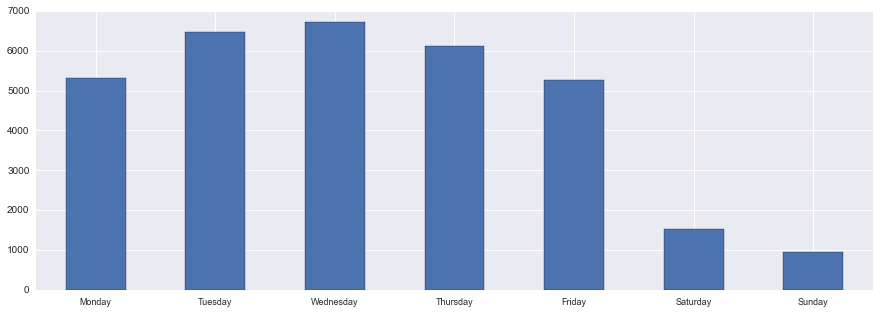

In [29]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9) #, ha ="left") 

###IF WE DON'T WANT TO CREATE ANOTHER COLUMN IN DATAFRAME WE CAN SET CUSTOM LABELS
#days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#xticks(np.arange(7), days, rotation = 0,fontsize = 9) #, ha ="left") 

savefig('day-of-week counts.png', bbox_inches='tight', dpi=300, format='png')

<br>We see that, not surprisingly, there are many fewer tweets sent on the weekend over the course of 2013.

### Hour-of-Day Counts 

We might also be interested in the hour of the day that the tweets are sent. We only need to access our index's <i>hour</i> attribute to accomplish this.

In [30]:
hourly_count = df.groupby(df.index.hour).apply(f)
print len(hourly_count)
hourly_count

24


,Number_of_tweets
0,1020
1,743
2,420
3,250
4,189
5,238
6,144
7,93
8,117
9,99


<br>Now let's plot the data. First let's try the default plot. As you'll see, it's a line plot with ticks every five hours. 

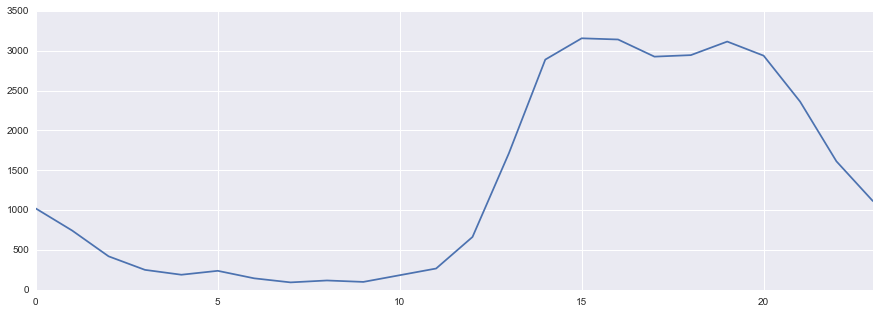

In [31]:
hourly_plot = hourly_count['Number_of_tweets'].plot()

<br>We can show ticks for each hourby adding a line of code. 

([<matplotlib.axis.XTick at 0x10d90c210>,
 <a list of 24 Text xticklabel objects>)

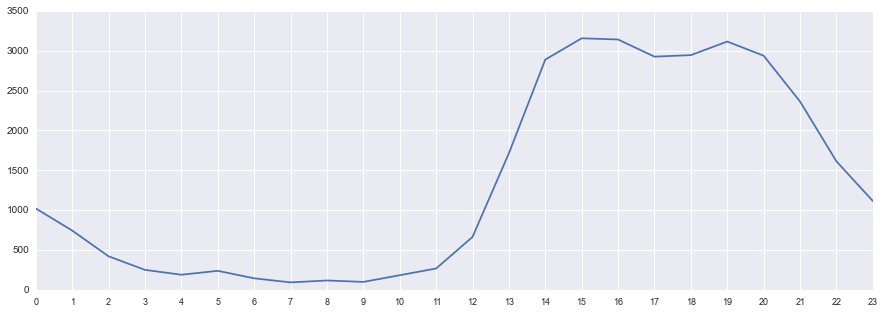

In [33]:
hourly_plot = hourly_count['Number_of_tweets'].plot()
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 

<br>However, it is showing the hours in the "pythonic" way -- from 0 to 23. We can fix that by adding a list with the hours 1-24 and then invoking that list in our xticks command. The plot below also adds labels for the x and y axes and saves the output in PNG format.` 

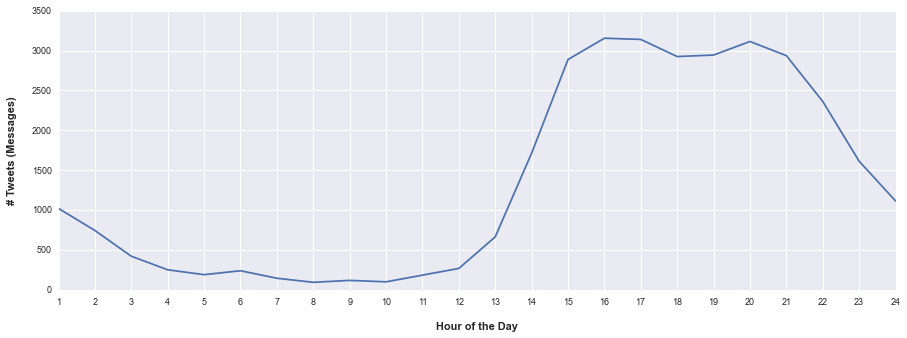

In [34]:
hourly_plot = hourly_count['Number_of_tweets'].plot(kind='line')
hours = list(range(1,25))                                                #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('hourly counts - line graph.png', bbox_inches='tight', dpi=300, format='png')

<br>It's then easy to copy the above code block and change it to a bar graph by adding <i>kind='bar'</i> to the first line.

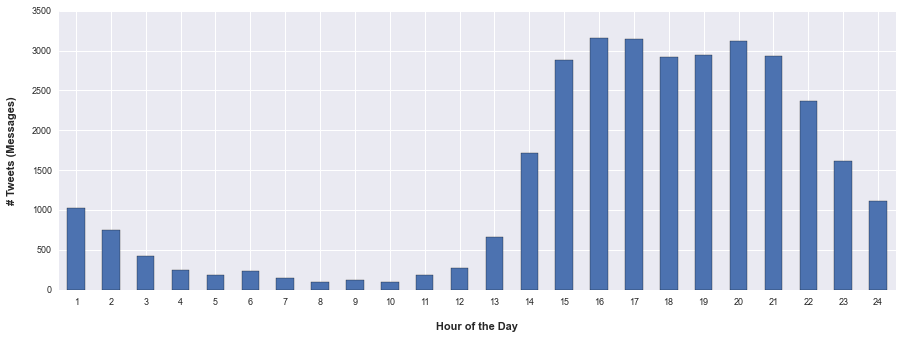

In [35]:
hourly_plot = hourly_count['Number_of_tweets'].plot(kind='bar')
hours = list(range(1,25))                                                 #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('hourly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

### Generate Monthly Tweet Count

Generating a count by month follows the same process.

In [36]:
monthly_count = df.groupby(df.index.month).apply(f)
print len(monthly_count)
monthly_count

12


,Number_of_tweets
1,3203
2,3056
3,2973
4,3162
5,2784
6,2366
7,2314
8,2314
9,2485
10,3207


<br>Using basically the same code as above, we can plot a bar graph of these data. The one change is the second line of code -- here we use the <i>calendar</i> package to help generate a list of the months of the year. Python has a ton of such specialized packages to help same save.

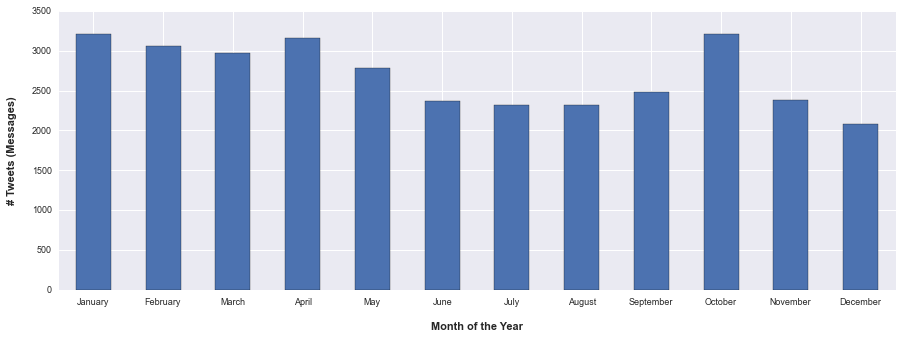

In [41]:
monthly_plot = monthly_count['Number_of_tweets'].plot(kind='bar')
months = list(calendar.month_name[1:])                                    #GENERATE LIST OF MONTHS
xticks(np.arange(12), months, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

monthly_plot.set_xlabel('Month of the Year', weight='bold', labelpad=15)  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
monthly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('monthly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

### Getting Ridiculous: Number of Tweets per Minute

In case you ever wanted to, you can also access the minute at which the tweets were posted. Note that the <i>minute</i> attribute refers to the minute of the hour, not the minute of the day. That is, the <i>n</i> is 60. 

In [42]:
minute_count = df.groupby(df.index.minute).apply(f)
print len(minute_count)
minute_count.head()

60


,Number_of_tweets
0,3126
1,634
2,600
3,557
4,471


<br>I'll just use the default plot here. There appears to be a spike at the 1st and 30th minutes of each hour. Probably due to automatic scheduling of tweets.

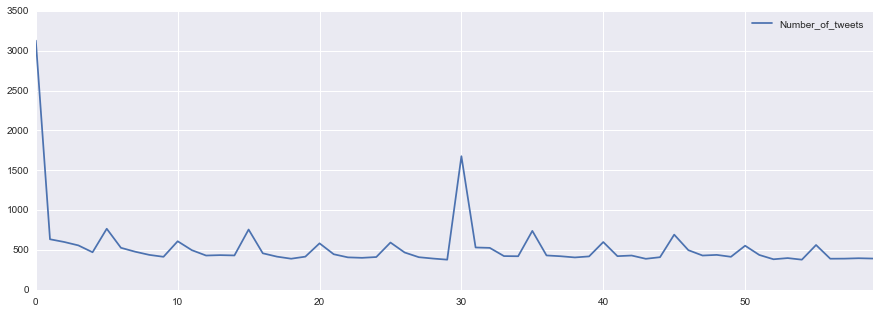

In [239]:
minute_count.plot()

### Super Ridiculous: Number of Tweets per Second

Note that the <i>second</i> attribute refers to the second of the minute, so the <i>n</i> is 60.

In [44]:
second_count = df.groupby(df.index.second).apply(f)
print len(second_count)
second_count.head()

60


,Number_of_tweets
0,1227
1,1626
2,1720
3,1141
4,920


<br>Not much useful information here. There are spikes at the first, second, and third seconds of the minute, probably also due to automated scheduling of the tweets.

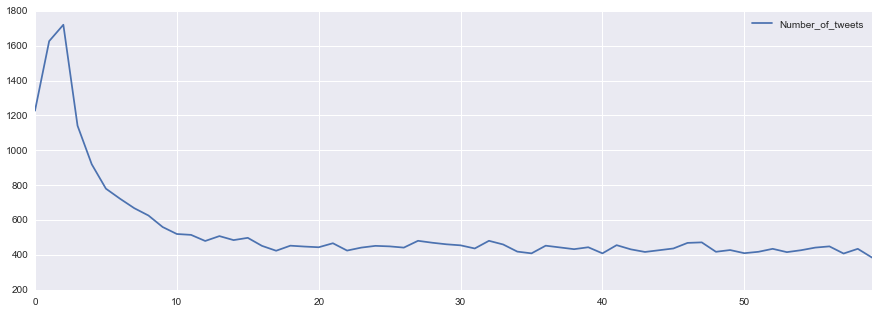

In [46]:
second_count.plot()

## Alternative Plotting Styles

I like the <i>Seaborn</i> styles shown above. However, you might want to play around with some of the other styles available to you. First, let's try the plot with the 'default' mpl_style. For each style, I'll show you a line plot (# of tweets per day of the year) and a bar graph (# of tweets per day of the week).

In [52]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

In [53]:
plt.rcParams['figure.figsize'] = (15, 5)

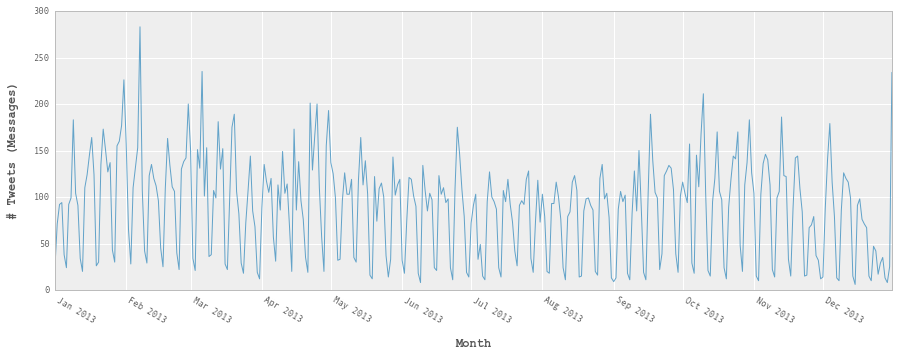

In [54]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x115cc3e90>,
 <a list of 7 Text xticklabel objects>)

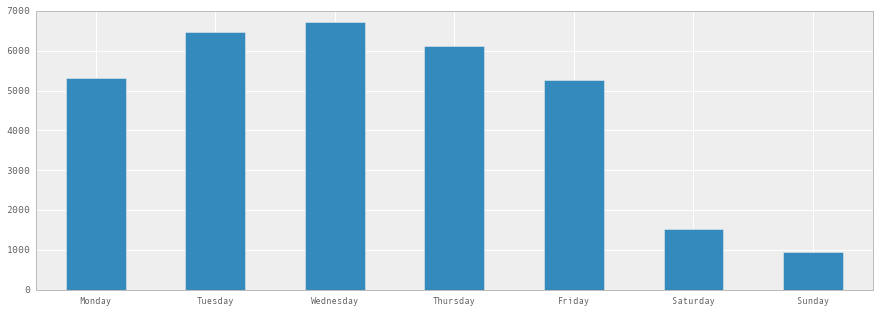

In [55]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

### Try Matplotlib's ggplot style

Matplotlib 1.4 also comes with five different built-in styles. Let's try them all out.

In [50]:
mpl.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']

<br>First, let's run it in <i>dark_background</i> style. We only have to run the following line of code and then all subsequent plots will be run in this style.

In [60]:
mpl.style.use('dark_background')

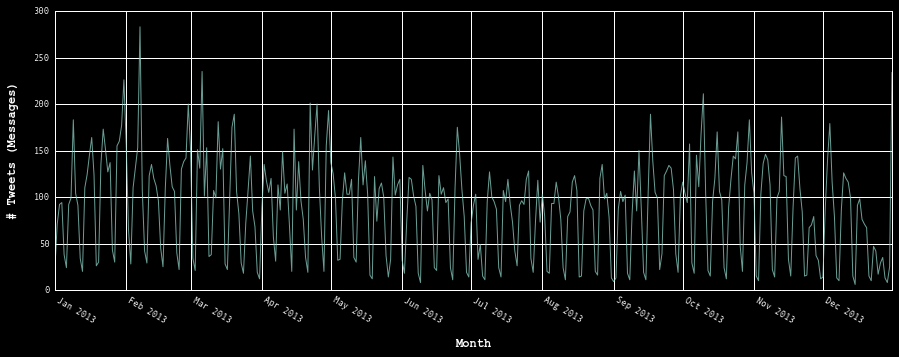

In [61]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x11748cd90>,
 <a list of 7 Text xticklabel objects>)

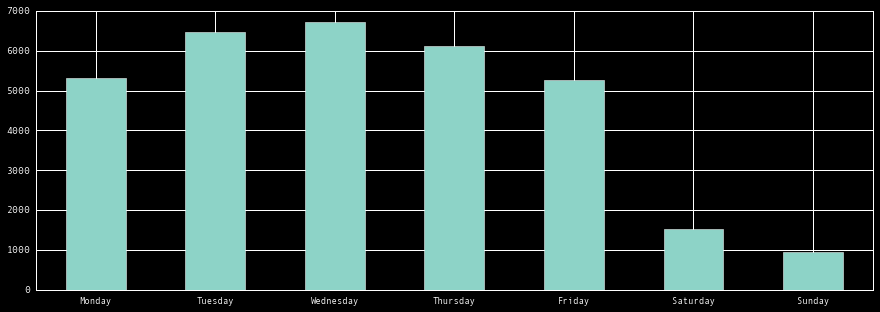

In [62]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

<br>Now let's run it in <i>bmh</i> style

In [63]:
mpl.style.use('bmh')

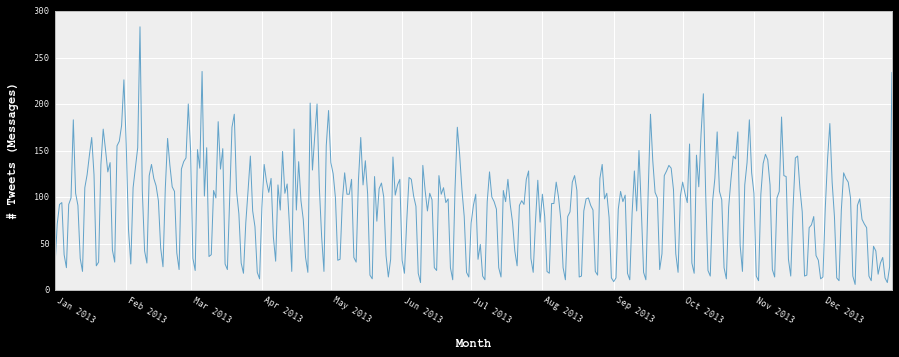

In [64]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x115c86790>,
 <a list of 7 Text xticklabel objects>)

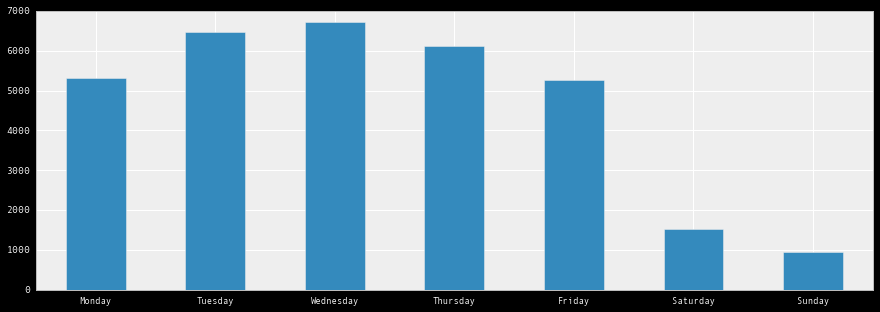

In [65]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

<br>Now in <i>grayscale</i> style

In [66]:
mpl.style.use('grayscale')

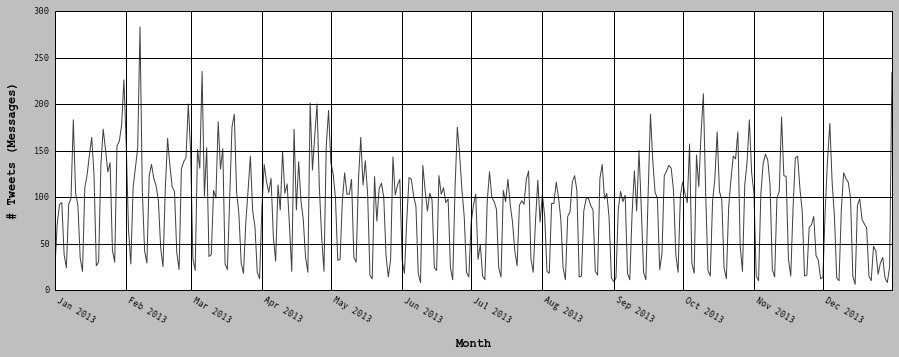

In [67]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABE
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x117bfa650>,
 <a list of 7 Text xticklabel objects>)

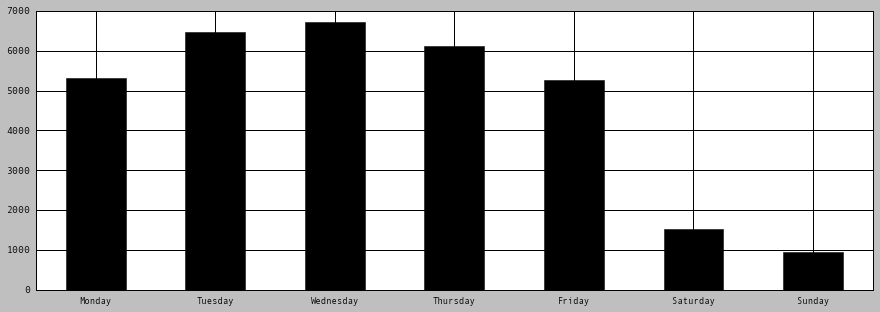

In [68]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

<br>And here's <i>ggplot</i> style -- patterned after the popular <i>R</i> plotting package.

In [69]:
mpl.style.use('ggplot')

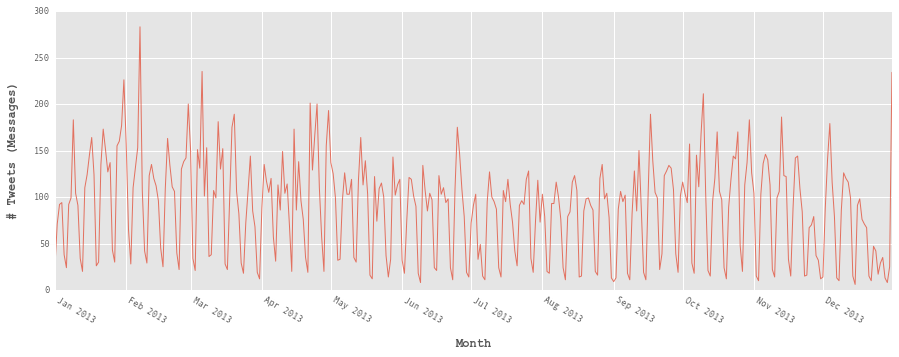

In [70]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x10d007210>,
 <a list of 7 Text xticklabel objects>)

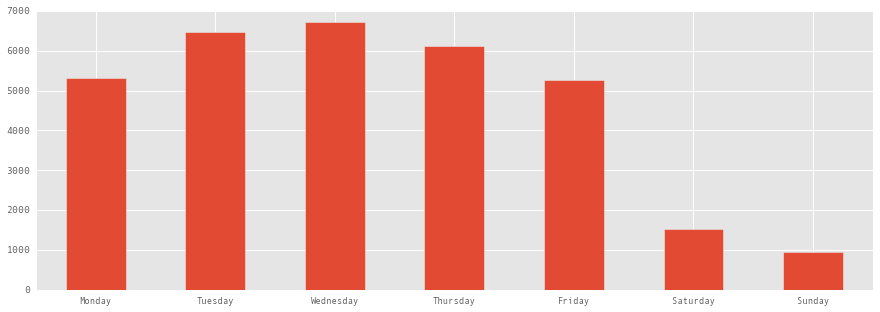

In [71]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

<br>Finally, let's run it in <i>fivethirtyeight</i> style, so named after Nate Silver's statistics site http://fivethirtyeight.com/

In [72]:
mpl.style.use('fivethirtyeight')

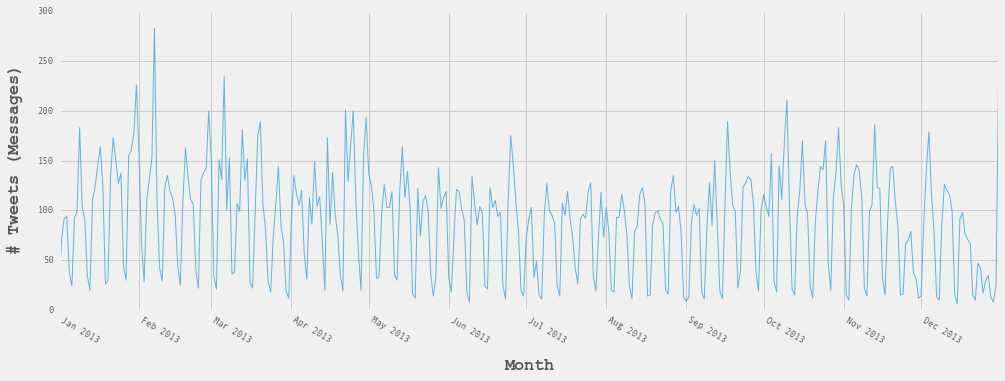

In [73]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x117f16d10>,
 <a list of 7 Text xticklabel objects>)

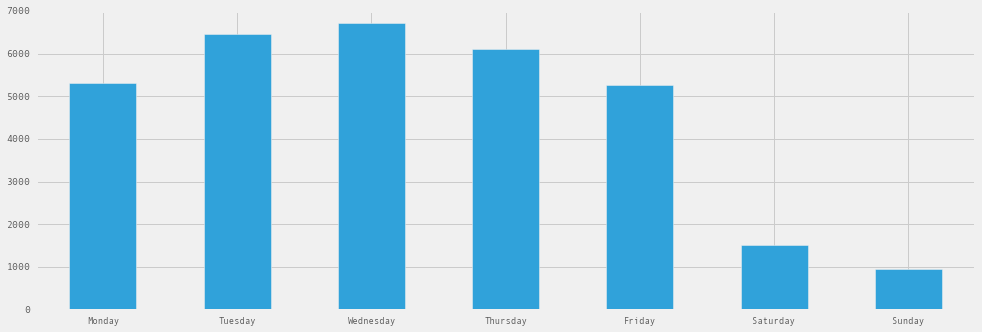

In [74]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

<br>OK, we have covered a few important steps in this tutorial. We have created a number of datasets that aggregate the 41 accounts' 2013 tweets by different time periods -- by second, minute, hour, day, month, and date. In so doing, you have been introduced to PANDAS' powerful <i>indexing</i> capabilities. We have also explored additional options and styles for plotting your data. In the next tutorial we will cover various analyses of the hashtags that are included in the collection of tweets.

<br>

For more Notebooks as well as additional Python and Big Data tutorials, please visit http://social-metrics.org or follow me on Twitter <a href='https://twitter.com/gregorysaxton'>@gregorysaxton</a>